In [2]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

with h5py.File('../../CodePass2/runs/finale.hdf5', 'r') as f:
    # read the data
    x = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]

In [3]:
gb_left = np.logical_and(properties == 1, x[0,:,1] < 0)

(-76.01607761383056, 58.47767505645752, -25.64211187362671, 25.65928373336792)

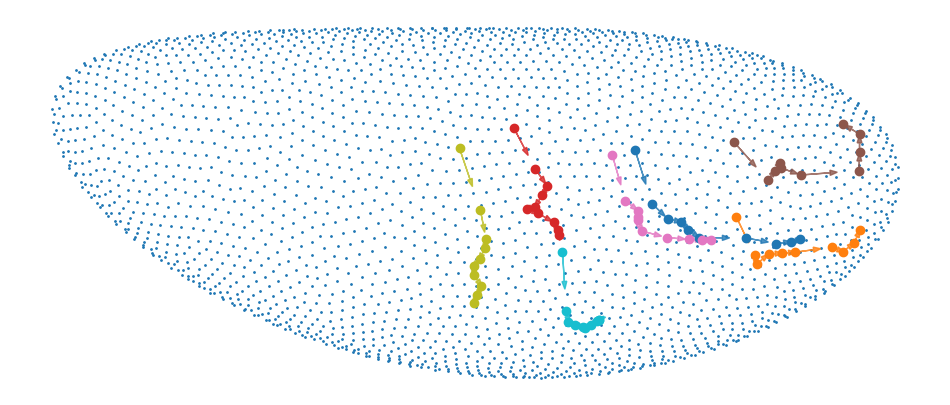

In [4]:
# make 10 time steps
ts = np.linspace(1,x.shape[0]-1, 10,).astype(int)

# get 5 random particles in gb
gb_particles = np.where(gb_left)[0]
gb_particles = np.random.choice(gb_particles, 5)
best_gb = [3367, 4537, 498, 1994, 1735, 2856, 567]

y = x[0,:,1]

plt.figure(figsize=(12,5))
plt.scatter(x[0,:,0][y < 0], x[0,:,2][y < 0], s = 1)

# plt.show()
# make 7 distinct colors

from matplotlib import cm
cols = cm.tab10(np.linspace(0,1,7))

# for t in ts:
    # plt.figure(figsize=(10,5))
    # plt.scatter(x[t,:,0][y < 0], x[t,:,2][y < 0])
for i in range(len(best_gb)):
    p, c = best_gb[i], cols[i]
    plt.plot(x[ts,p,0], x[ts,p,2], 'o', c =c , alpha =1)
    # make an arrowfrom each point to halfway between the next point
    for j in range(len(ts)-1):
        halfway = (x[ts[j],p] + x[ts[j+1],p])/2
        plt.arrow(x[ts[j],p,0], x[ts[j],p,2], halfway[0] - x[ts[j],p,0], halfway[2] - x[ts[j],p,2], color = c, alpha = 0.8, head_width = 0.7)
    # plt.show()
# remove the axes
plt.axis('off')

In [8]:
ts[::3]

array([ 334, 1333, 2333])

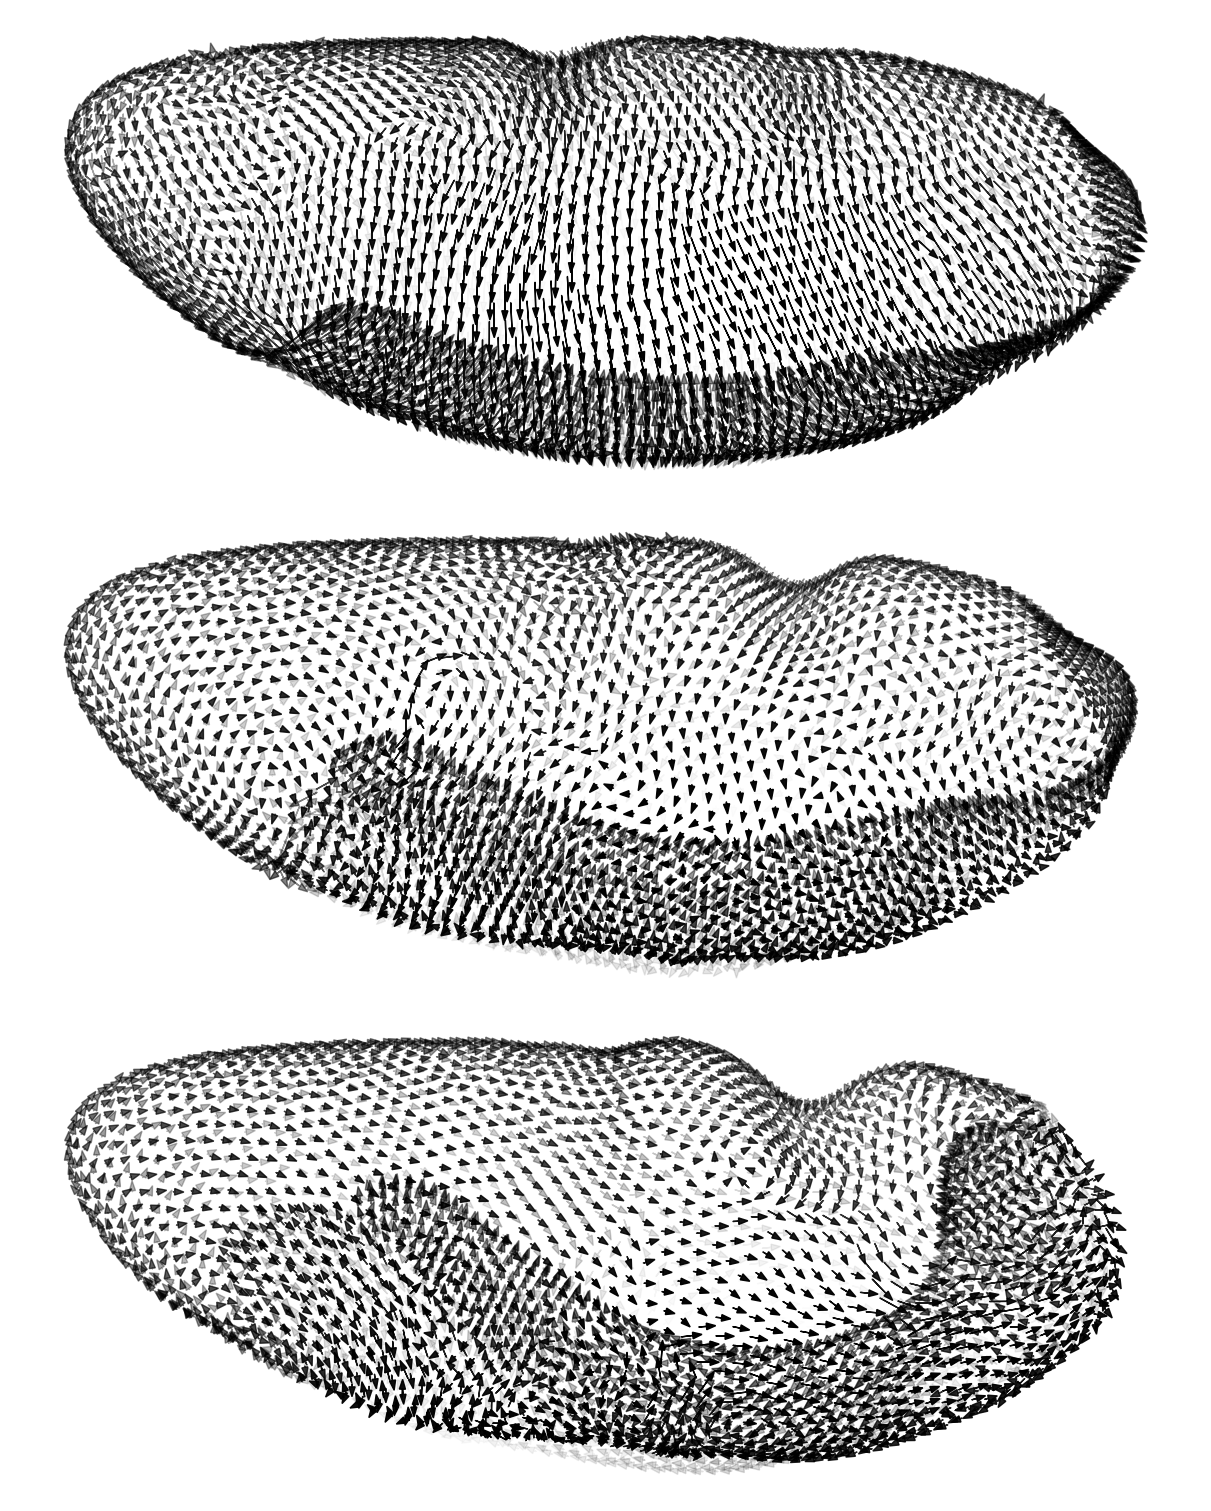

In [12]:


fig, axs = plt.subplots(3, 1, figsize=(12,3*5), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()
since = 70
axind = 0
for t in ts[1::3]:
    if t == 0:
        continue
    t -= 200
    movements_since_last = x[t] - x[t-since]

    # for each particle, draw an arrow showing the movement since last
    for cell in range(x.shape[1]):
        if y[cell] > -100:
            axs[axind].arrow(x[t-since,cell,0], x[t-since,cell,2], movements_since_last[cell,0], movements_since_last[cell,2], color = 'black', alpha = np.minimum(np.abs(y[cell]+23.4)/(23.4*2) + 0.0, 1), head_width = 0.7)
    

    # remove the axes
    axs[axind].axis('off')
    axind += 1

plt.show()

In [16]:
import pandas as pd
import numpy as np

stas = pd.read_csv('../../DeconstructingGastrulation-Data/tracked_data_rescaled.csv')

stas.head()

,Unnamed: 0.1,Unnamed: 0,x,y,z,frame,particle,dx,dy,dz
0,0,0,-4.739862,-26.555828,0.309946,1,0,NaN,NaN,NaN
1,1,1,-4.811905,-26.555293,0.320071,1,1,NaN,NaN,NaN
2,2,2,-5.964577,-26.535062,0.482068,1,2,NaN,NaN,NaN
3,3,3,-5.947833,-26.517885,2.169408,1,3,NaN,NaN,NaN
4,4,4,-6.439664,-26.571131,1.283488,1,4,NaN,NaN,NaN


-69.902725

In [37]:
print(x[0].min(), stas.x.min())
print(x[0].max(), stas.x.max())

# rotate the stas data 45 degrees around y
rot  = 0.055
stas['x_rot'] = stas.x*np.cos(rot) - stas.z*np.sin(rot)
stas['z_rot'] = stas.x*np.sin(rot) + stas.z*np.cos(rot)
stas['y_rot'] = stas.y


-69.902725 -79.21731966161327
52.40632 60.94438451825841


In [52]:
np.isnan(stas.dx

0          True
1          True
2          True
3          True
4          True
          ...  
512999     True
513000    False
513001     True
513002    False
513003     True
Name: dx, Length: 513004, dtype: bool

In [88]:

fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True, sharex=True, sharey=True)

axs_left = [axs[0,0], axs[1,0], axs[2,0]]
axs_right = [axs[0,1], axs[1,1], axs[2,1]]
since = 70
axind = 0
for t in ts[1::3]:
    if t == 0:
        continue
    t -= 200
    movements_since_last = x[t] - x[t-since]

    # for each particle, draw an arrow showing the movement since last
    for cell in range(x.shape[1]):
        if y[cell] > 2:
            axs_left[axind].arrow(x[t-since,cell,0], x[t-since,cell,2], movements_since_last[cell,0], movements_since_last[cell,2], color = 'black', alpha = np.minimum(np.abs(y[cell]+23.4)/(23.4*2) + 0.0, 1), head_width = 0.7)
    

    # remove the axes
    axs_left[axind].axis('off')
    axind += 1


axind = 0
for i in [3, 5, 10]:
    # for cell in stas[stas.frame == 10]:
    wh = stas[stas.frame == i].y < 0
    xx, zz = stas[stas.frame == i][wh].x_rot, stas[stas.frame == i][wh].z_rot
    dx, dz = stas[stas.frame == i][wh].dx, stas[stas.frame == i][wh].dz
    # normalize the vectors
    norm = np.sqrt(dx**2 + dz**2)
    dx = dx/norm
    dz = dz/norm
    for j in range(len(xx)):
        axs_right[axind].arrow(xx.iloc[j], zz.iloc[j], dx.iloc[j], dz.iloc[j], color = 'black', alpha = 1, head_width = 0.7)
    # axs_right[axind].quiver(xx, zz, dx, dz, color = 'black', alpha = 1., headwidth = 3., )

    axs_right[axind].axis('off')
    axind += 1

plt.show()


In [201]:
# littmanasd
n_runs = 100_000

bobs, alices = np.zeros(n_runs), np.zeros(n_runs)
for run in range(n_runs):
    # 100 coin flips
    n = 100
    # 0 is heads, 1 is tails
    flips = np.random.randint(0,2,n)
    
    # check Alice
    for i in range(1,n):
        if flips[i] and flips[i-1]:
            alices[run] = i
            break
    # check Bob
    for i in range(1,int(n/2)):
        # check if last two flips were tails
        if flips[i*2] and flips[i*2-2]:
            bobs[run] = i
            break




array([3., 2., 1., ..., 1., 3., 3.])

In [200]:
print(sum(alices > bobs))
print(sum(alices < bobs))
print(sum(alices == bobs))


45226
34000
20774


In [193]:
winners.mean()

0.54967